In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from data_prep import DataPrep
from linear_regression import StockLinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import random


In [37]:
data_prep = DataPrep()
stock_linear_regression = StockLinearRegression()

In [38]:
df = data_prep.load_raw_data(laptop=True)
df = data_prep.prep_raw_data(df=df)
df = data_prep.calc_rsi(df=df)

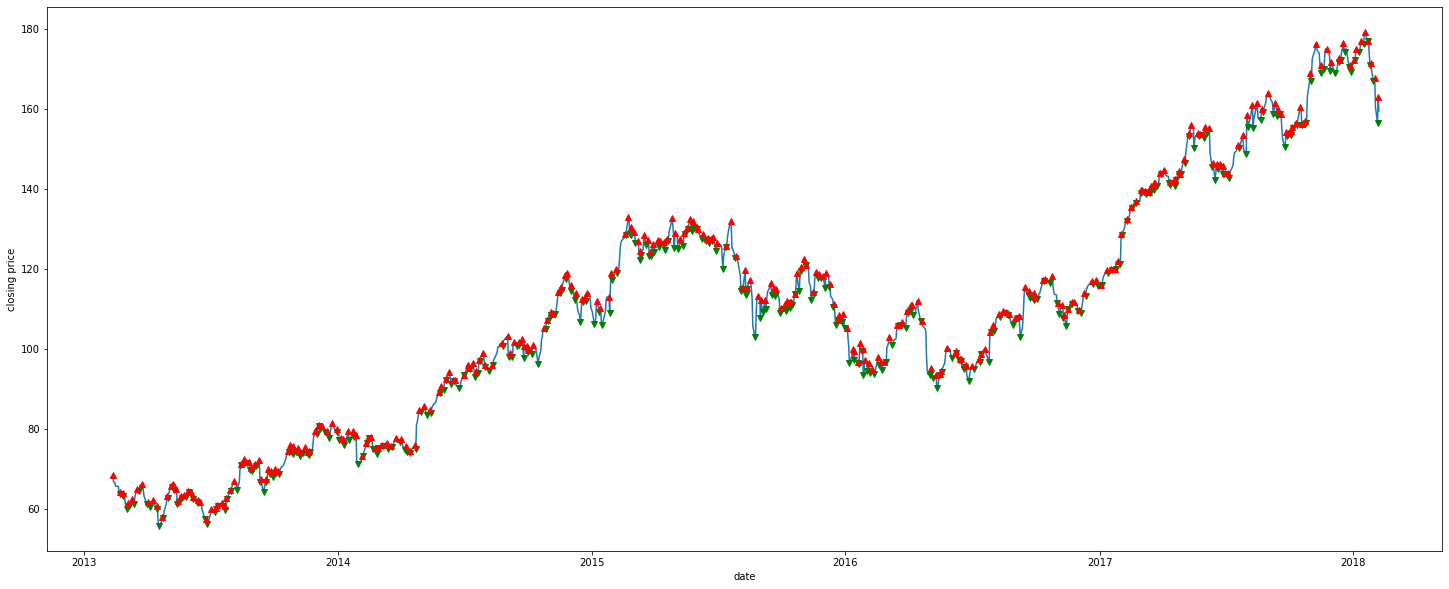

In [39]:
x = df['date']
y = df['close']
y1 = df['local_min']
y2 = df['local_max']

plt.figure(figsize=(25,10))
plt.plot(x, y)
plt.plot(x, y1, lw=10, color='green', marker="v")
plt.plot(x, y2, lw=10, color='red', marker="^")
plt.xlabel("date")
plt.ylabel("closing price")
plt.show()

In [86]:
days = []

for i in range(0,50):
    day_list = []
    for j in range(0,20):
        

In [88]:
results = []
for day_list in days:
    coef_data = stock_linear_regression.create_coef_data(df=df, days = day_list)
    training_data = data_prep.prep_training_data(coef_df=coef_data, stock_df=df)
    X = training_data.drop(columns = 'target')
    y = training_data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    logReg = LogisticRegression()
    grid_vals = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1], 'solver' : ['lbfgs']}
    grid_logReg =  GridSearchCV(estimator=logReg, param_grid=grid_vals, scoring='accuracy', 
                        cv=6, refit=True, return_train_score=True)
    grid_logReg.fit(X_train, y_train)
    score = grid_logReg.best_estimator_.score(X_test, y_test)
    result = [grid_logReg.best_estimator_, score]
    results.append(result)

In [91]:
results

[[LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRegression(C=0.001), 0.7339743589743589],
 [LogisticRe

In [51]:
coef_data = stock_linear_regression.create_coef_data(df=df, days = [3,5,10,20])

In [52]:
training_data = data_prep.prep_training_data(coef_df=coef_data, stock_df=df)

In [53]:
training_data

,3_day_linear_regression,5_day_linear_regression,10_day_linear_regression,20_day_linear_regression,normalized_value,volume,RSI,target
13,-8.113960e-15,-3.427964e-15,-3.151954e-16,2.248381e-15,-0.985554,80532382,24.624522,0
14,-1.111200e-15,4.575035e-18,6.574980e-16,2.293988e-15,-0.911287,137899041,20.971554,0
15,4.639468e-15,3.766204e-15,1.731291e-15,1.766514e-15,-0.828514,145406366,13.604105,1
16,-4.641204e-16,2.531578e-15,2.498833e-15,1.118334e-15,0.517980,159298020,28.011179,0
17,5.008102e-15,1.358028e-15,3.359012e-15,7.355825e-16,-0.799141,114903180,26.440900,1
...,...,...,...,...,...,...,...,...
1254,-2.869925e-14,-1.064037e-14,-1.064037e-14,-1.064037e-14,0.031031,47230787,31.034935,0
1255,2.061075e-15,5.042989e-16,5.042989e-16,5.042989e-16,-0.559832,86593825,16.963405,0
1256,1.765046e-14,1.765046e-14,1.765046e-14,1.765046e-14,-0.461916,72738522,14.932173,1
1257,-4.039352e-14,-4.039352e-14,-4.039352e-14,-4.039352e-14,8.089370,68243838,26.160912,0


In [54]:
X = training_data.drop(columns = 'target')
y = training_data['target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [74]:
logReg = LogisticRegression()
grid_vals = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1], 'solver' : ['lbfgs']}
grid_logReg =  GridSearchCV(estimator=logReg, param_grid=grid_vals, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

In [75]:
grid_logReg.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             return_train_score=True, scoring='accuracy')

In [76]:
preds = grid_logReg.best_estimator_.predict(X_test)

In [77]:
score = grid_logReg.best_estimator_.score(X_test, y_test)

In [78]:
score

0.7339743589743589

In [33]:
cm = metrics.confusion_matrix(y_test, predictions)

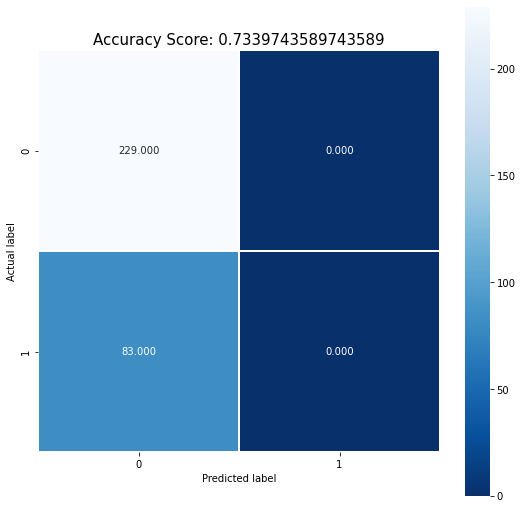

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);